In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
import os
# root_path = 'gdrive/My Drive/bio_film'
root_path = '/content/gdrive/MyDrive/biofilm_workshop_classification/'
os.chdir(root_path)

In [155]:
from tensorflow.keras.applications import VGG16
vgg_base = VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(150, 150, 3))
print(vgg_base.summary())
vgg_base2 = VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(150, 150, 3))

vgg_base2.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [156]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
model = Sequential([
        # our vgg16_base model added as a layer
        vgg_base,
        # here is our custom prediction layer 
        Flatten(),
        Dropout(0.50),
        Dense(1024, activation='relu'),
        Dropout(0.20),        
        Dense(512, activation='relu'),
        Dropout(0.10),         
        Dense(1, activation='sigmoid')    
    ])

vgg_base.trainable = False


In [157]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_34 (Flatten)        (None, 8192)              0         
                                                                 
 dropout_102 (Dropout)       (None, 8192)              0         
                                                                 
 dense_102 (Dense)           (None, 1024)              8389632   
                                                                 
 dropout_103 (Dropout)       (None, 1024)              0         
                                                                 
 dense_103 (Dense)           (None, 512)               524800    
                                                                 
 dropout_104 (Dropout)       (None, 512)             

In [161]:
train_data_dir = root_path + 'dataset/datasetnew/'
# /content/gdrive/MyDrive/biofilm_workshop_classification/dataset

In [162]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height=128
img_width=128
batch_size=16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2) # set validation split

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = valid_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 156 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [173]:
x,y = train_generator.__getitem__(0)
x[0].shape

(128, 128, 3)

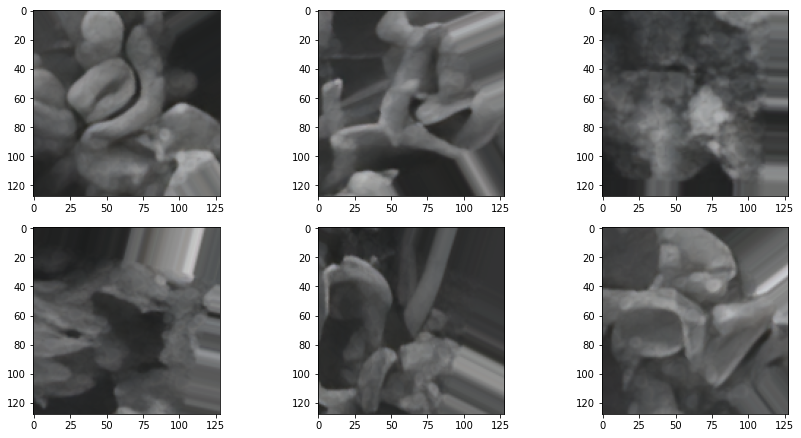

In [174]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(4, 3, i+1)
    # for X_batch, Y_batch in train_generator.__getitem__(0):
    image = x[i]
    plt.imshow(image)
    
    
plt.tight_layout()
plt.show()

In [175]:
from tensorflow.keras.optimizers import Adam , SGD,Adadelta, RMSprop

optimizer = Adam(learning_rate=1e-4)
loss = 'binary_crossentropy'
model.compile(optimizer=optimizer, 
              loss=loss,
              metrics=['accuracy'])

train_steps = train_generator.n // batch_size
val_steps = validation_generator.n // batch_size

In [154]:
# def build_model2():
#     from tensorflow.keras.layers import Flatten, Dense, Dropout
#     from tensorflow.keras.optimizers import Adam
    
# model = Sequential([
#     # our vgg16_base model added as a layer
#     vgg_base,
#     # here is our custom prediction layer (same as before)
#     Flatten(),
#     Dropout(0.50),
#     Dense(1024, activation='relu'),
#     Dropout(0.20),        
#     Dense(512, activation='relu'),
#     Dropout(0.10),         
#     Dense(1, activation='sigmoid')    
# ])
# vgg_base.trainable=False
# # mark the top 2 layers of vgg_base as trainable
# trainable = False
# for layer in vgg_base.layers:
#     if layer.name.__contains__('block5'):
#       #  trainable = True 
#         layer.trainable = True

# model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_33 (Flatten)        (None, 8192)              0         
                                                                 
 dropout_99 (Dropout)        (None, 8192)              0         
                                                                 
 dense_99 (Dense)            (None, 1024)              8389632   
                                                                 
 dropout_100 (Dropout)       (None, 1024)              0         
                                                                 
 dense_100 (Dense)           (None, 512)               524800    
                                                                 
 dropout_101 (Dropout)       (None, 512)             

In [152]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_32 (Flatten)        (None, 8192)              0         
                                                                 
 dropout_96 (Dropout)        (None, 8192)              0         
                                                                 
 dense_96 (Dense)            (None, 1024)              8389632   
                                                                 
 dropout_97 (Dropout)        (None, 1024)              0         
                                                                 
 dense_97 (Dense)            (None, 512)               524800    
                                                                 
 dropout_98 (Dropout)        (None, 512)             

In [176]:
model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=val_steps)

Epoch 1/80
9/9 [==============================] - 42s 4s/step - loss: 0.7073 - accuracy: 0.5786 - val_loss: 0.4637 - val_accuracy: 0.7812
Epoch 2/80
9/9 [==============================] - 33s 4s/step - loss: 0.5026 - accuracy: 0.7643 - val_loss: 0.3934 - val_accuracy: 0.8125
Epoch 3/80
9/9 [==============================] - 31s 3s/step - loss: 0.4660 - accuracy: 0.7643 - val_loss: 0.3565 - val_accuracy: 0.8750
Epoch 4/80
9/9 [==============================] - 31s 4s/step - loss: 0.3498 - accuracy: 0.8611 - val_loss: 0.3729 - val_accuracy: 0.8750
Epoch 5/80
9/9 [==============================] - 31s 3s/step - loss: 0.4235 - accuracy: 0.8357 - val_loss: 0.2412 - val_accuracy: 0.8750
Epoch 6/80
9/9 [==============================] - 34s 4s/step - loss: 0.4387 - accuracy: 0.8194 - val_loss: 0.3819 - val_accuracy: 0.8438
Epoch 7/80
9/9 [==============================] - 31s 3s/step - loss: 0.3564 - accuracy: 0.8429 - val_loss: 0.4448 - val_accuracy: 0.8438
Epoch 8/80
9/9 [==================

In [177]:
model.save("model.h5")

In [178]:
# def build_model2():
#     from tensorflow.keras.layers import Flatten, Dense, Dropout
#     from tensorflow.keras.optimizers import Adam
    
#     model2 = Sequential([
#         # our vgg16_base model added as a layer
#         vgg_base2,
#         # here is our custom prediction layer (same as before)
#         Flatten(),
#         Dropout(0.50),
#         Dense(1024, activation='relu'),
#         Dropout(0.20),        
#         Dense(512, activation='relu'),
#         Dropout(0.10),         
#         Dense(1, activation='sigmoid')    
#     ])
#     vgg_base2.trainable = True
#     # mark the top 2 layers of vgg_base as trainable
#     trainable = False
#     for layer in vgg_base2.layers:
#        if layer.name.__contains__('block5'):
#            print(layer.name)
#            trainable = True
#        layer.trainable = trainable
    
#     model2.compile(optimizer=Adam(lr=1e-4), 
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])
#     return model2

# model2 = build_model2()
# vgg_base2.summary()

In [223]:
score = model.evaluate(validation_generator)
print(score[1]*100)

y_predict = model.predict(validation_generator)




3/3 [==============================] - 8s 2s/step - loss: 0.4587 - accuracy: 0.9211
92.1052634716034


In [224]:
import numpy as np

y_predict = np.where(y_predict > 0.3, 1, 0)

p = validation_generator.classes
q = y_predict
p = np.array(p)

q = q.flatten() 


In [225]:
validation_generator.class_indices

{'biprods': 0, 'nonbiprods': 1}

[[12  7]
 [ 7 12]]


[Text(0, 0.5, 'corrosion'), Text(0, 1.5, 'noncorrosion')]

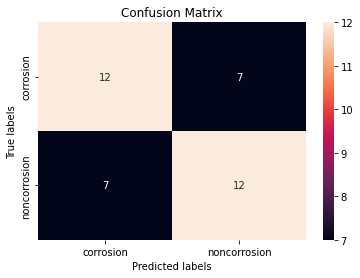

In [226]:

from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import shutil
import numpy as np 
import seaborn as sns

cfm = confusion_matrix(p, q)
print(cfm)
ax= plt.subplot()
sns.heatmap(cfm, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Biproducts', 'nonBiproducts'])
ax.yaxis.set_ticklabels(['Biproducts', 'nonBiproducts'])

In [227]:
print(classification_report(p,q))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.63      0.63      0.63        19

    accuracy                           0.63        38
   macro avg       0.63      0.63      0.63        38
weighted avg       0.63      0.63      0.63        38



[[0.00030562]]
According to our model's prediction below image is of a biprods


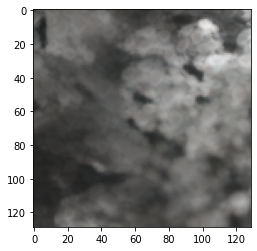

In [210]:
path = "/content/gdrive/MyDrive/biofilm_workshop_classification/dataset/datasetnew/biprods/3_385_1153_(128 128)@patch.png"
img = cv2.imread(path)
# image = cv2.resize(img, (128, 128))
img = img/255.0
plt.imshow(img)
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
# img = np.divide(img,255)
result = model.predict(img)
print(result)
if result[0] >= 0.3:
    print("According to our model's prediction below image is of a Non biprods")
else:
    print("According to our model's prediction below image is of a biprods")